In [1]:
import sys
import pandas as pd
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

sys.path.append(project_root)
data_dir = os.path.join(project_root, 'data')

data_file_path = os.path.join(data_dir, 'RADCURE_processed_clinical.csv')
df = pd.read_csv(data_file_path, index_col=0)

df.drop(columns=["Study ID", "survival_time", "death"], inplace=True)

In [2]:
from jarvais.analyzer import Analyzer
from rich import print

analyzer = Analyzer(
    data=df, 
    output_dir='./outputs/analyzer',
    categorical_columns= [
      "Sex",
      "T Stage",
      "N Stage",
      "Stage",
      "Smoking Status",
      "Disease Site",
      "HPV Combined",
      "Chemotherapy"
    ],
    continuous_columns = [
      "age at dx",
      "Dose"
    ],
    target_variable='Dose', 
    task='classification'
)
analyzer.encoding_module.enabled = False # AutoGluon will handle encoding

print(analyzer)

analyzer.run()

/home/joshua-siraj/Documents/CDI/jarvais/.pixi/envs/dev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
15:02:49 [warning  ] Date columns not specified. Inferring from remaining columns. [jarvais] call=analyzer.__init__:76


Analyzer(
    AnalyzerSettings(
        output_dir=PosixPath('outputs/analyzer'),
        categorical_columns=[
            'Sex',
            'T Stage',
            'N Stage',
            'Stage',
            'Smoking Status',
            'Disease Site',
            'HPV Combined',
            'Chemotherapy'
        ],
        continuous_columns=['age at dx', 'Dose'],
        date_columns=[],
        task='classification',
        target_variable='Dose',
        generate_report=True,
        settings_path=None,
        settings_schema_path=None,
        missingness=MissingnessModule(
            categorical_strategy={
                'Sex': 'unknown',
                'T Stage': 'unknown',
                'N Stage': 'unknown',
                'Stage': 'unknown',
                'Smoking Status': 'unknown',
                'Disease Site': 'unknown',
                'HPV Combined': 'unknown',
                'Chemotherapy': 'unknown'
            },
            continuous_strategy={'age at dx': 'median', 'Dose': 'median'},
            enabled=True
        ),
        outlier=OutlierModule(
            categorical_strategy={
                'Sex': 'frequency',
                'T Stage': 'frequency',
                'N Stage': 'frequency',
                'Stage': 'frequency',
                'Smoking Status': 'frequency',
                'Disease Site': 'frequency',
                'HPV Combined': 'frequency',
                'Chemotherapy': 'frequency'
            },
            continuous_strategy={'age at dx': 'none', 'Dose': 'none'},
            threshold=0.01,
            enabled=True
        ),
        encoding=OneHotEncodingModule(
            columns=[
                'Sex',
                'T Stage',
                'N Stage',
                'Stage',
                'Smoking Status',
                'Disease Site',
                'HPV Combined',
                'Chemotherapy'
            ],
            target_variable='Dose',
            prefix_sep='|',
            enabled=False
        ),
        visualization=VisualizationModule(
            plots=['corr', 'pairplot', 'umap', 'frequency_table', 'multiplot'],
            enabled=True
        )
    )
)

         [info     ] Performing missingness analysis... [jarvais] call=missingness.__call__:43
         [info     ] Performing outlier analysis... [jarvais] call=outlier.__call__:53
         [info     ] Plotting Correlation Matrix... [jarvais] call=visualization.__call__:115


+-----------------------+-------------------+-----------+-------------+
|                       |                   | Missing   | Overall     |
+=======================+===================+===========+=============+
| n                     |                   |           | 3346        |
+-----------------------+-------------------+-----------+-------------+
| age at dx, mean (SD)  |                   | 0         | 62.3 (11.6) |
+-----------------------+-------------------+-----------+-------------+
| Dose, mean (SD)       |                   | 0         | 66.7 (5.8)  |
+-----------------------+-------------------+-----------+-------------+
| Sex, n (%)            | Female            |           | 686 (20.5)  |
+-----------------------+-------------------+-----------+-------------+
|                       | Male              |           | 2660 (79.5) |
+-----------------------+-------------------+-----------+-------------+
| T Stage, n (%)        | None              |           | 12 (0.

         [info     ] Plotting Pairplot...           [jarvais] call=visualization.__call__:118
15:02:50 [info     ] Plotting UMAP...               [jarvais] call=visualization.__call__:124
15:03:00 [info     ] Plotting Frequency Table...    [jarvais] call=visualization.__call__:121
15:03:07 [info     ] Plotting Multiplot...          [jarvais] call=visualization.__call__:136
15:03:11 [warning  ] One-hot encoding is disabled.  [jarvais] call=encoding.__call__:40
Font MPDFAA+Inter28ptBold is missing the following glyphs: '
' (\n)


In [3]:
from jarvais.trainer import TrainerSupervised

df = pd.read_csv('./outputs/analyzer/updated_data.csv')

trainer = TrainerSupervised(task='regression', output_dir='./outputs/trainer')
trainer.run(df, 'Dose')

Training fold 1/5...
Fold 1 score: 0.6668817529452749
Training fold 2/5...
Fold 2 score: 0.5944331638262828
Training fold 3/5...
Fold 3 score: 0.6045543370974688
Training fold 4/5...
Fold 4 score: 0.6360018803349704
Training fold 5/5...
Fold 5 score: 0.590947874967624

Model Leaderboard (Displays values in "mean [min, max]" format across training folds)
------------------------------------------------------------------------------------
+-----------------------+----------------------------+----------------------------+----------------------------+
| model                 | score_test                 | score_val                  | score_train                |
+=======================+============================+============================+============================+
| WeightedEnsemble_L2   | R2 0.62 [0.61, 0.63]       | R2 0.62 [0.59, 0.67]       | R2 0.71 [0.69, 0.76]       |
|                       | RMSE: -3.55 [-3.6, -3.49]  | RMSE: -3.54 [-3.87, -3.37] | RMSE: -3.09 [-3.21, -2.

⚠️  **Possible Bias Detected in N Stage** ⚠️

=== Subgroup Analysis for 'N Stage' Using OLS Regression ===

Model Statistics:
    R-squared:                  0.137
    F-statistic:                15.034
    F-statistic p-value:        0.0000
    AIC:                        3174.85
    Log-Likelihood:             -1579.42
Model Coefficients:
    +---------------+---------------+------------------+
    | Feature       |   Coefficient |   Standard Error |
    +===============+===============+==================+
    | const         |         1.937 |            0.139 |
    +---------------+---------------+------------------+
    | N Stage_N0    |         1.571 |            0.206 |
    +---------------+---------------+------------------+
    | N Stage_N1    |         0.829 |            0.329 |
    +---------------+---------------+------------------+
    | N Stage_N2    |        -1.328 |            0.380 |
    +---------------+---------------+------------------+
    | N Stage_N2a   |         

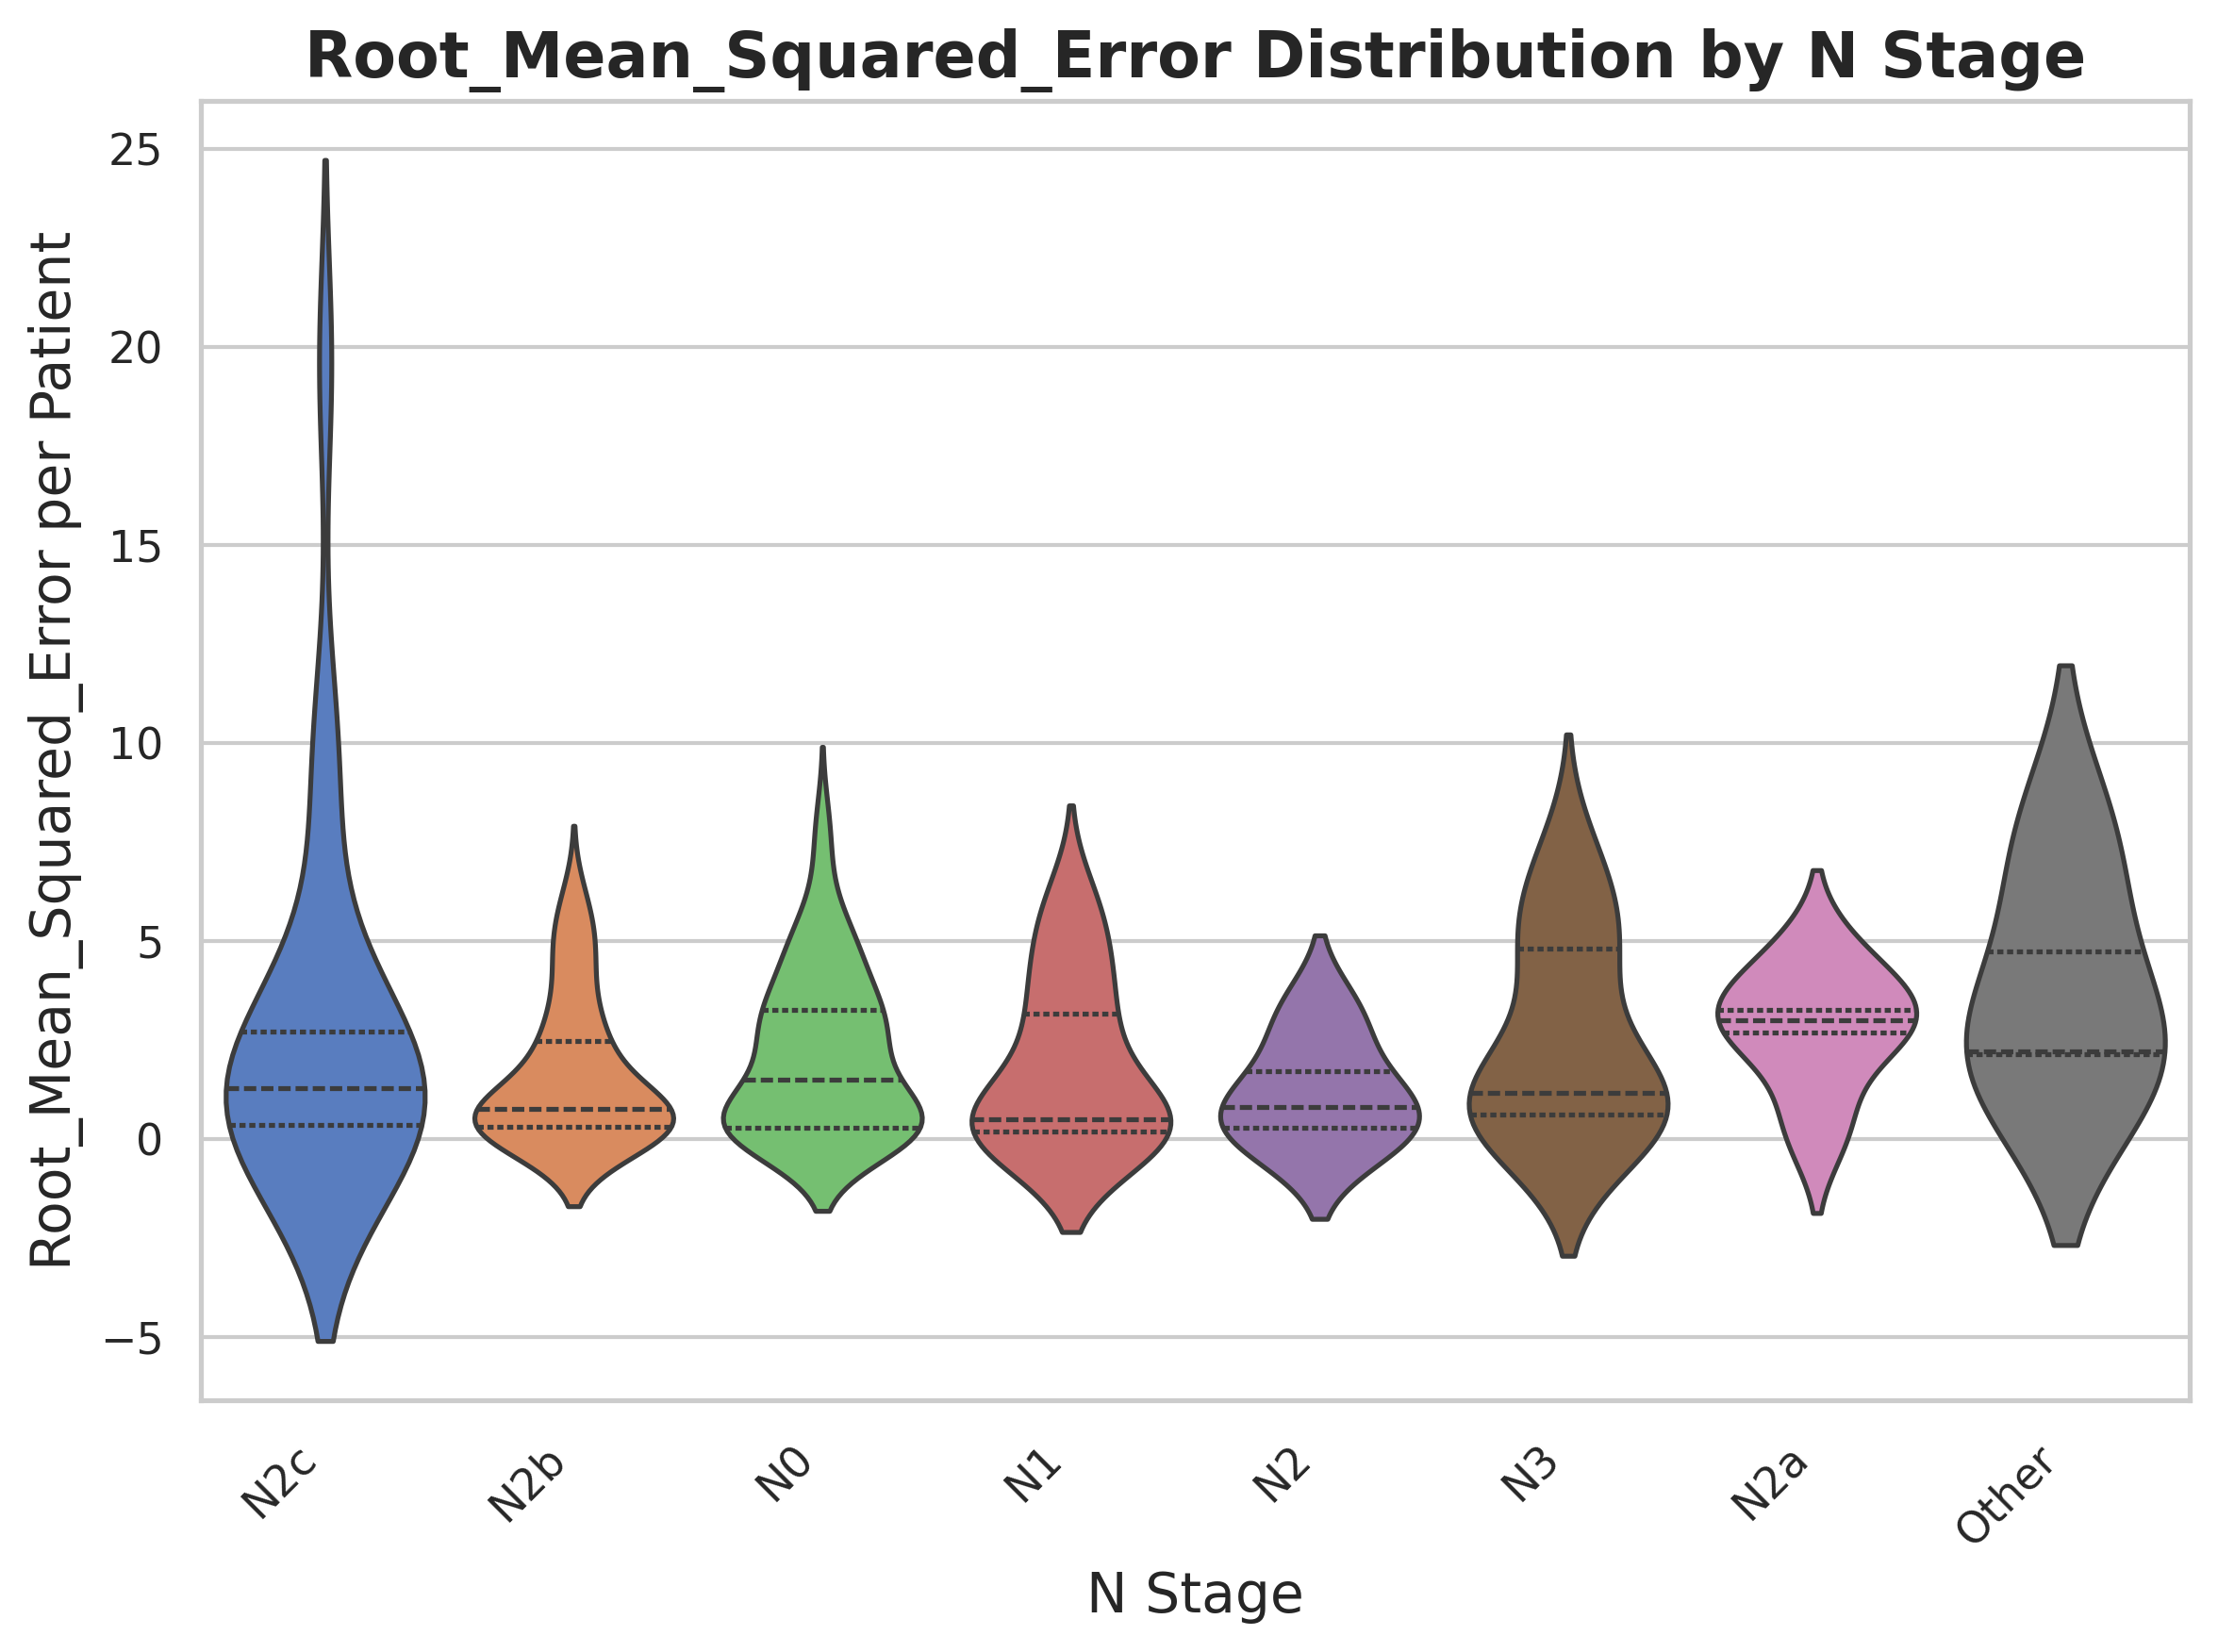


=== Subgroup Analysis for 'N Stage' using FairLearn ===

    +--------------------------+-------------------+-------------------+-------------------+------------------+
    |                          | N0                | N1                | N2                | N2a              |
    +==========================+===================+===================+===================+==================+
    | mean_prediction          | 63.11251277751751 | 67.65180969238281 | 70.02266953631145 | 67.6926611491612 |
    +--------------------------+-------------------+-------------------+-------------------+------------------+
    | Relative mean_prediction | 1.000 ✅          | 1.072 ✅          | 1.109 ✅          | 1.073 ✅         |
    +--------------------------+-------------------+-------------------+-------------------+------------------+ 

⚠️  **Possible Bias Detected in Disease Site** ⚠️

=== Subgroup Analysis for 'Disease Site' Using OLS Regression ===

Model Statistics:
    R-squared:          

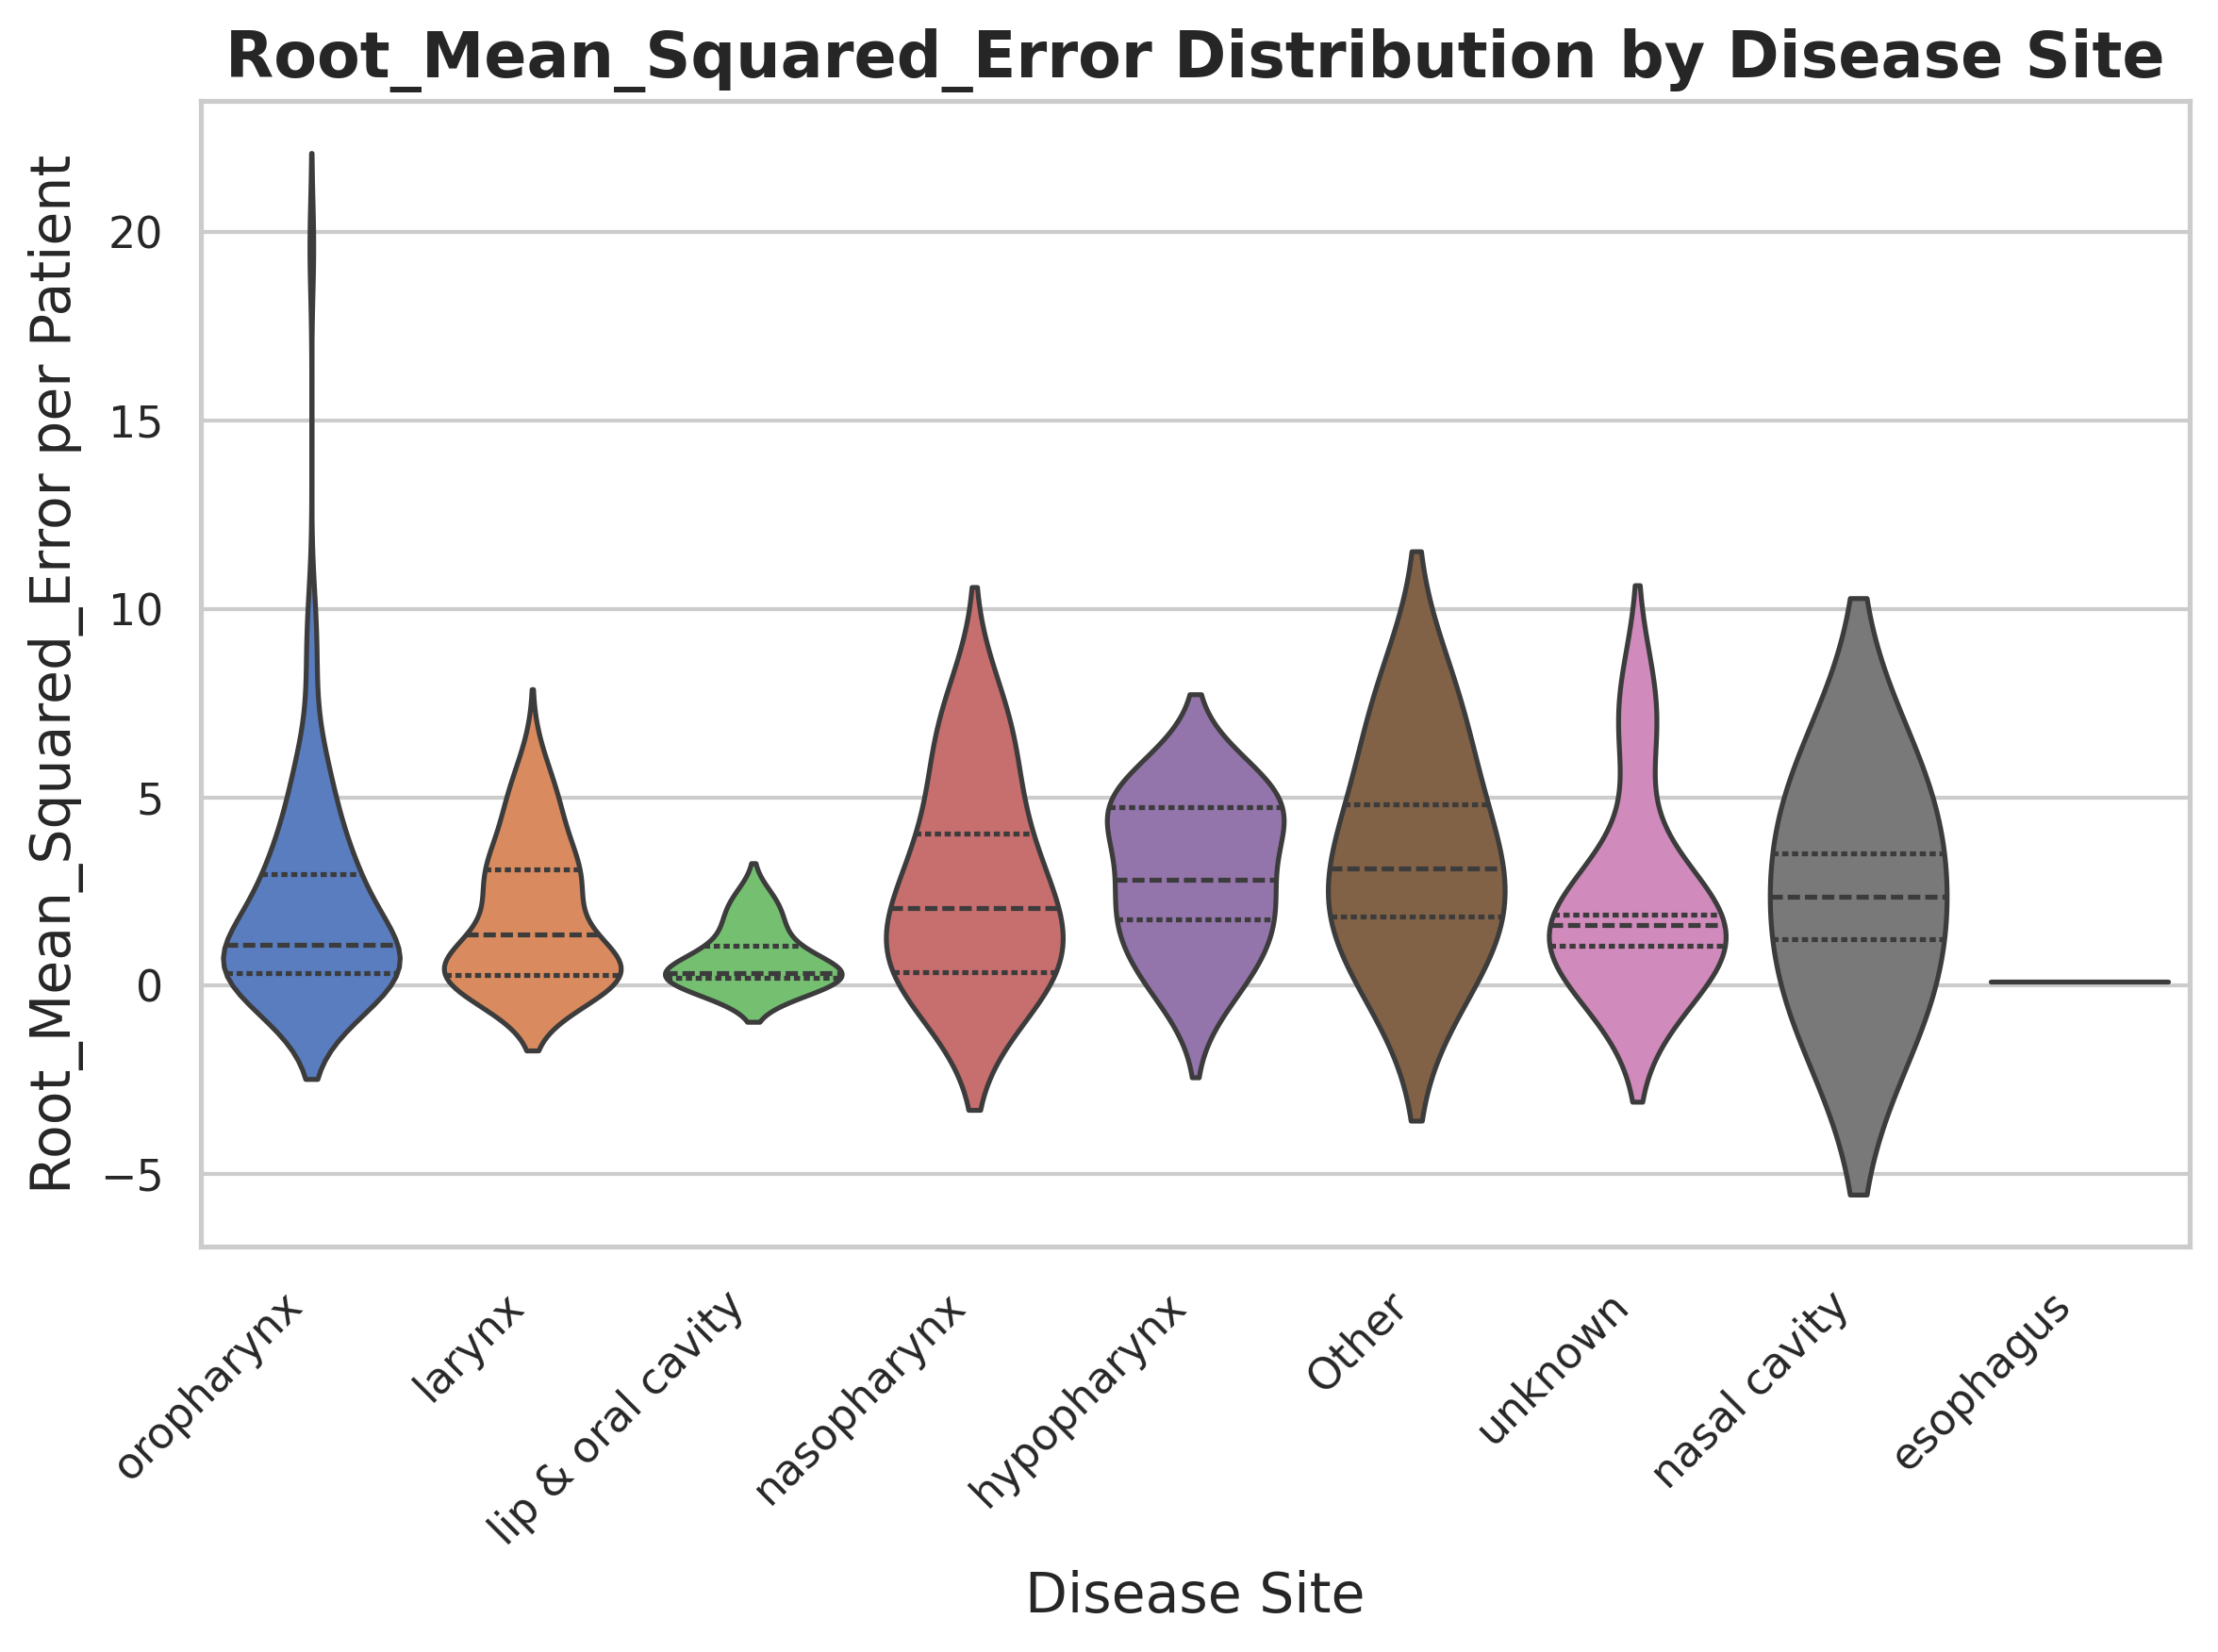


=== Subgroup Analysis for 'Disease Site' using FairLearn ===

    +--------------------------+-------------------+-------------------+-------------------+--------------------+
    |                          | Other             | esophagus         | hypopharynx       | larynx             |
    +==========================+===================+===================+===================+====================+
    | mean_prediction          | 65.05188573201498 | 66.81039047241211 | 67.64559576246474 | 62.185764588505386 |
    +--------------------------+-------------------+-------------------+-------------------+--------------------+
    | Relative mean_prediction | 0.947 ✅          | 0.972 ✅          | 0.984 ✅          | 0.905 ✅           |
    +--------------------------+-------------------+-------------------+-------------------+--------------------+ 



In [4]:
from jarvais.explainer import Explainer

sensitive_features = {k: trainer.X_test[k] for k in ['N Stage', 'Disease Site', 'Sex']}

exp = Explainer.from_trainer(trainer, sensitive_features=sensitive_features)
exp.run()